<a href="https://colab.research.google.com/github/jegazhu/python-projects/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*This dataset can be used for predictive data analytics purpose. In the most populated cities, the number of supermarkets is growing, and market competition is fierce. The dataset is a record of the historical sales made by a supermarket chain over a three-month period in 3 different branches. With this dataset, predictive data analytics techniques are simple to use.*

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Python_Data/supermarket_sales - Sheet1.csv")

In [5]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [6]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [9]:
data.shape

(1000, 17)

In [10]:
data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [11]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [12]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [13]:
data.isnull().any()

Invoice ID                 False
Branch                     False
City                       False
Customer type              False
Gender                     False
Product line               False
Unit price                 False
Quantity                   False
Tax 5%                     False
Total                      False
Date                       False
Time                       False
Payment                    False
cogs                       False
gross margin percentage    False
gross income               False
Rating                     False
dtype: bool

**Exploratory Data Analysis**

---



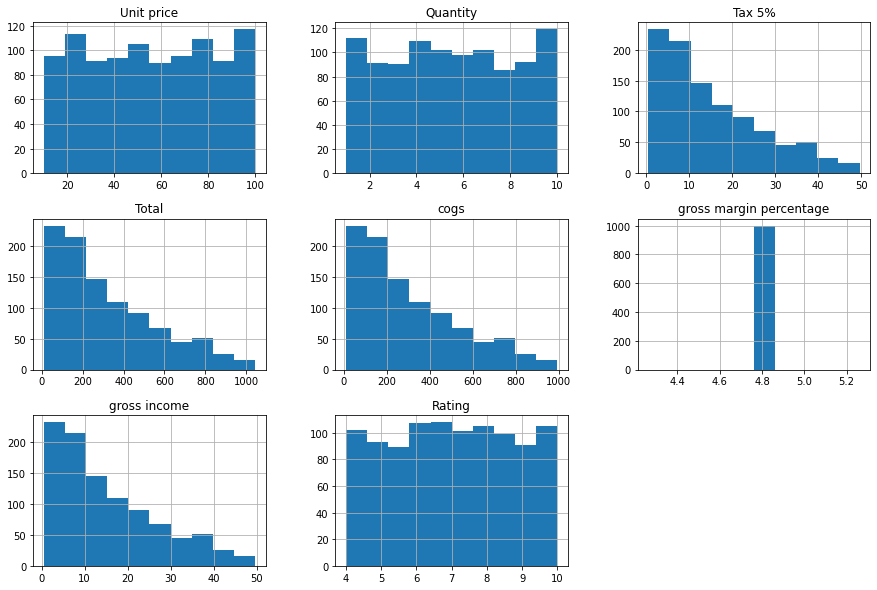

In [14]:
data.hist(figsize=(15,10))
plt.show()

In [15]:
data.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


**HEATMAP**

---



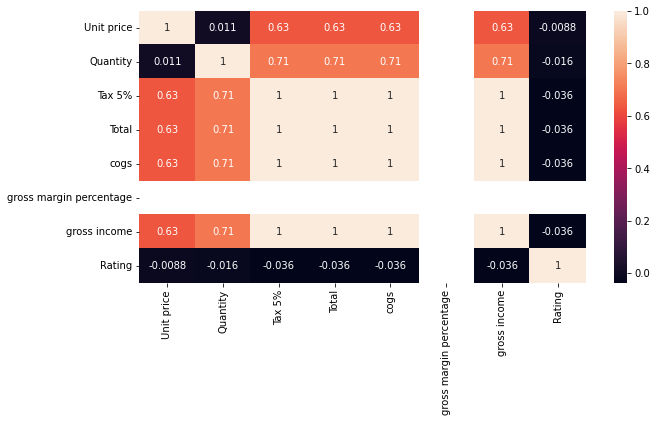

In [16]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot =True)

**BOXPLOT**

---



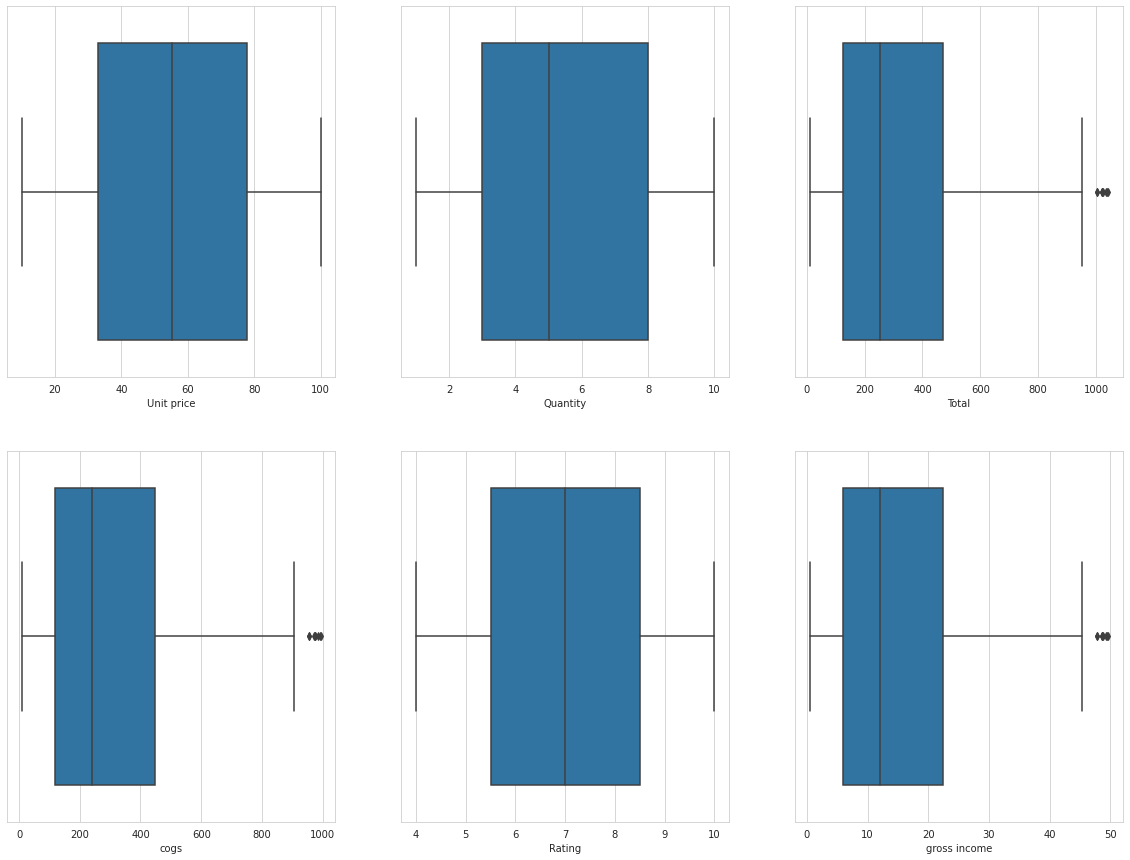

In [17]:
plt.figure(figsize=(20,15))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Unit price',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='Quantity',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='Total',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='cogs',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='Rating',data=data)
plt.subplot(2,3,6)
sns.boxplot(x='gross income',data=data)

**PAIRPLOT**

---



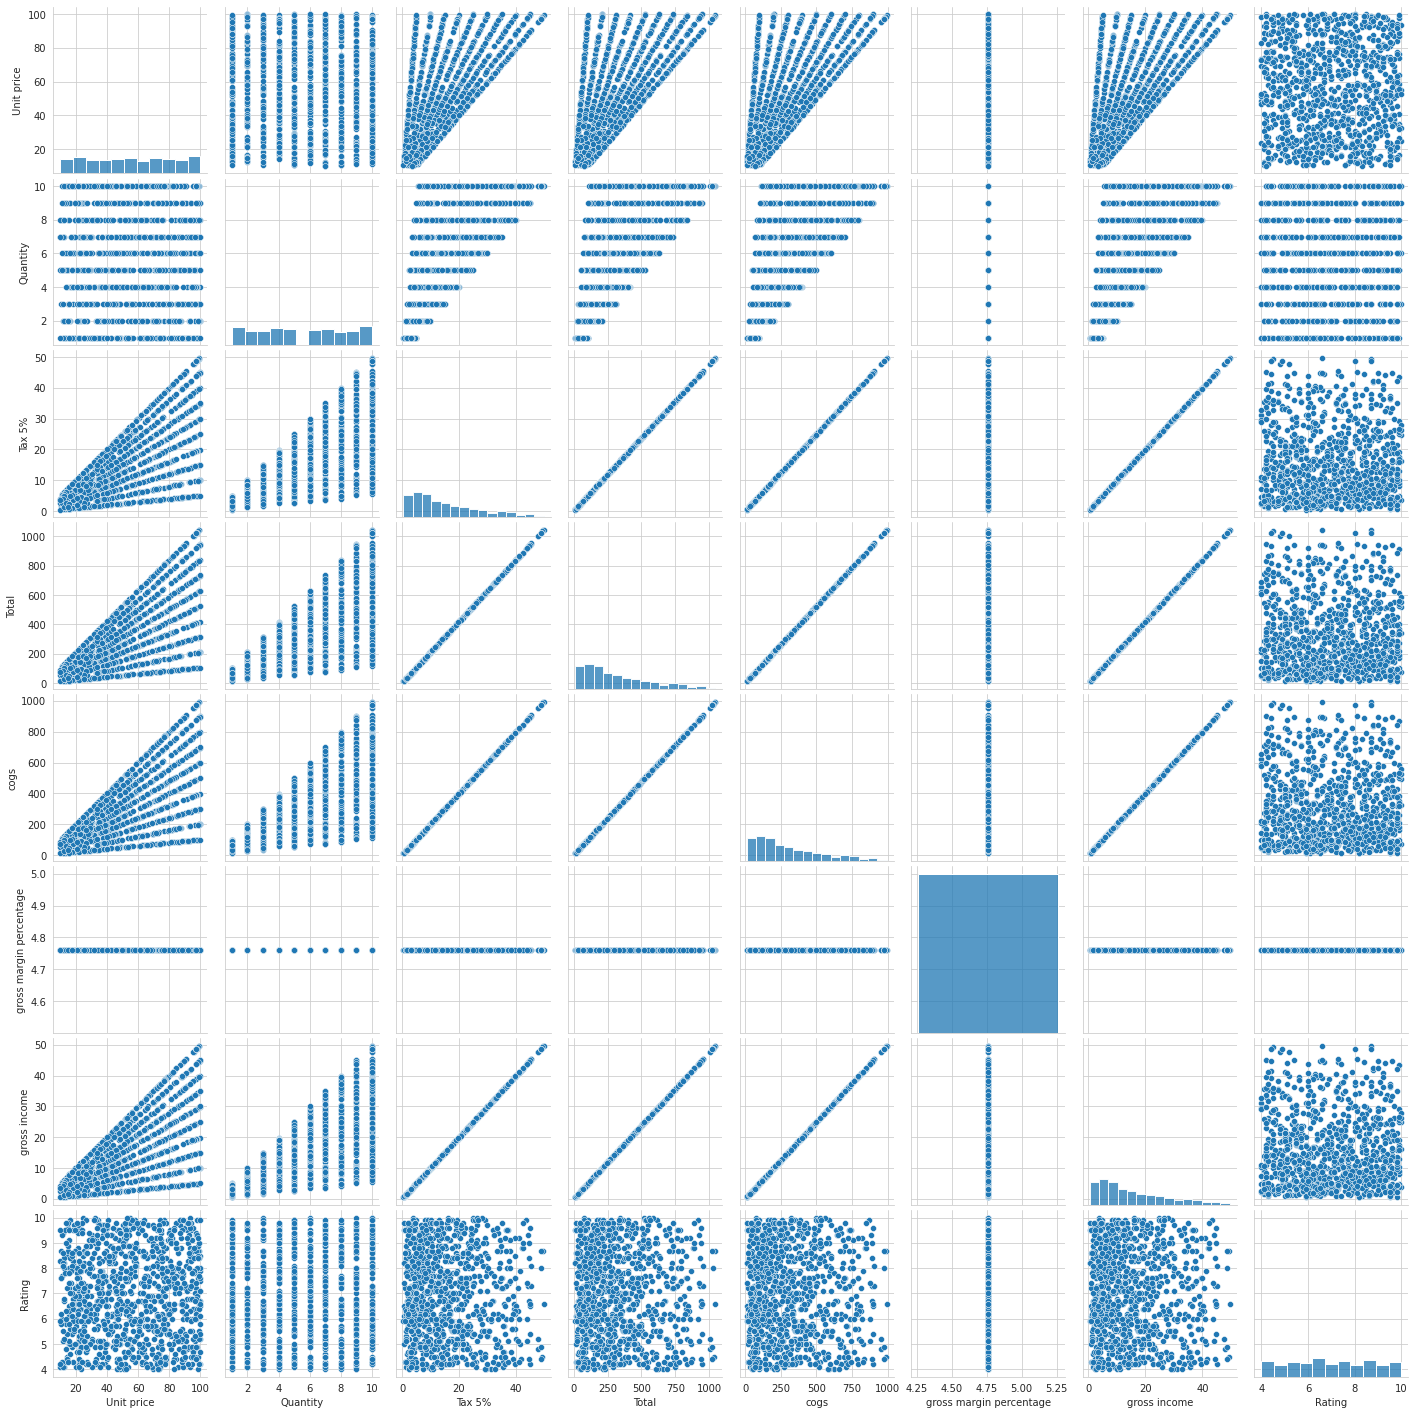

In [18]:
sns.pairplot(data=data)

**REGPLOT**

---



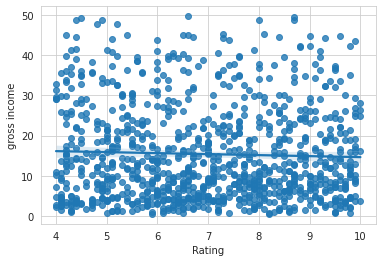

In [19]:
sns.regplot(x='Rating', y= 'gross income', data=data)

**SCATTER PLOT** - *The position of each dot on the horizontal and vertical axis indicates values for an individual data point.*

---



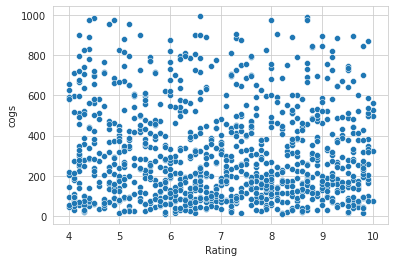

In [20]:
sns.scatterplot(x='Rating', y= 'cogs', data=data)

**JOINTPLOT** - *This code creates a joint plot using the Seaborn library, with the x-axis representing the column 'Rating' and the y-axis representing the column 'Total' in the dataframe 'data'. The joint plot will show the relationship between the rating and total of the items in the dataframe and also show the univariate distribution of the x and y variable with kde on top and histogram on the side.*.

---



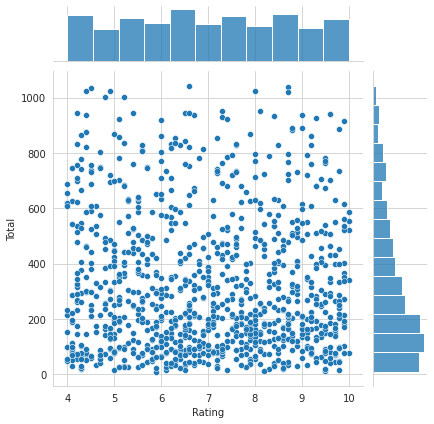

In [30]:
sns.jointplot(x='Rating', y= 'Total', data=data)

**LINEPLOT** - *This code creates a line plot using the Seaborn library, with the x-axis representing the column 'Rating' and the y-axis representing the column 'Unit price' in the dataframe 'data'. The line plot will show the relationship between the rating and unit price of the items in the dataframe.*

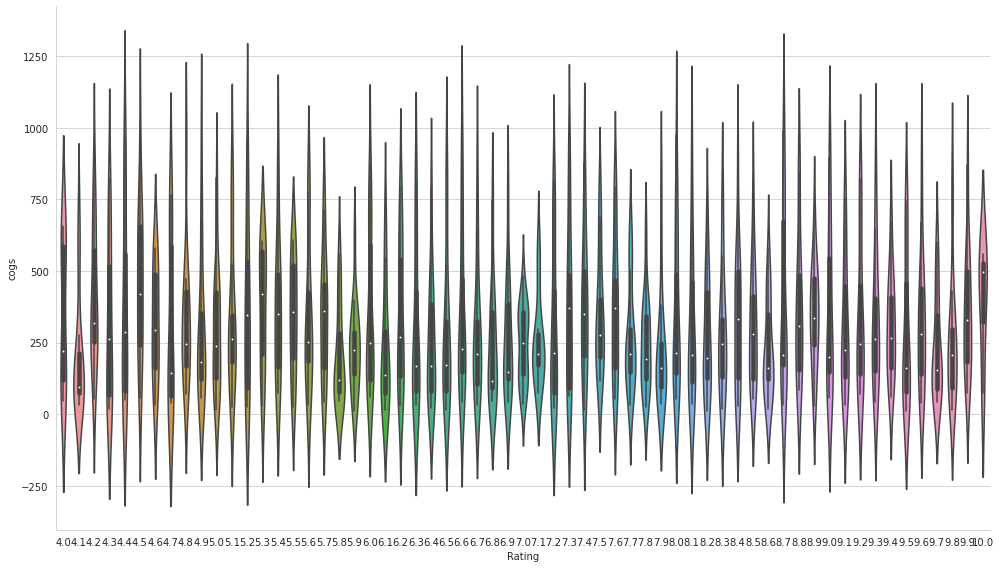

In [26]:
sns.catplot(x='Rating', y= 'cogs', data=data, kind="violin", split=True, height=8, aspect=1.75)

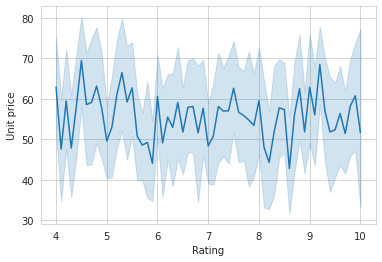

In [54]:
sns.lineplot(x='Rating', y= 'Unit price', data=data)

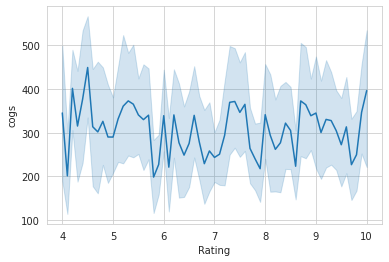

In [40]:
sns.lineplot(x='Rating', y= 'cogs', data=data)

*The x-axis will represent the column 'Rating' and the y-axis will represent the column 'Gender' in the dataframe 'data' for the rows indexed 170 to 180. The bar plot will show the relationship between the rating and gender of the items in the dataframe.*

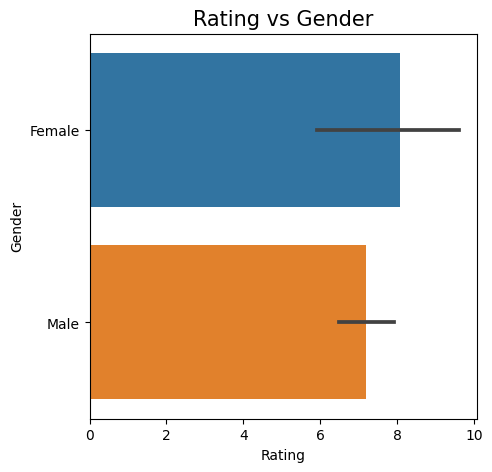

In [28]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Gender", data=data[150:170])
plt.title("Rating vs Gender",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Gender")
plt.show()

In [29]:
#lets find the categorialfeatures
list_1=list(data.columns)

list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in list_cate:
    data[i]=le.fit_transform(data[i])

In [30]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,26,146,2,522.83,4.761905,26.1415,9.1
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,87,23,0,76.40,4.761905,3.8200,9.6
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,81,155,1,324.31,4.761905,16.2155,7.4
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,19,485,2,465.76,4.761905,23.2880,8.4
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,57,29,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,153,2,1,1,1,3,40.35,1,2.0175,42.3675,21,174,2,40.35,4.761905,2.0175,6.2
996,250,1,0,1,0,4,97.38,10,48.6900,1022.4900,70,342,2,973.80,4.761905,48.6900,4.4
997,767,0,2,0,1,2,31.84,1,1.5920,33.4320,58,154,0,31.84,4.761905,1.5920,7.7
998,308,0,2,1,1,4,65.82,1,3.2910,69.1110,45,261,0,65.82,4.761905,3.2910,4.1


In [31]:
y=data['Gender']
x=data.drop('Gender',axis=1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

print(len(x_train), 'x-train')
print(len(x_test), 'x-test')
print(len(y_train), 'y-train')
print(len(y_test), 'y-test')

800 x-train
200 x-test
800 y-train
200 y-test


*This will help you identify the accuracy and performance of the model on unseen data and help you identify the areas of improvement if required.*

---



In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.47      0.49      0.48       100
           1       0.47      0.45      0.46       100

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200

Confusion Matrix:
 [[49 51]
 [55 45]]
Training Score:
 64.75


In [33]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

y_pred=svc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",svc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.45      0.49      0.47       100
           1       0.44      0.40      0.42       100

    accuracy                           0.45       200
   macro avg       0.44      0.45      0.44       200
weighted avg       0.44      0.45      0.44       200

Confusion Matrix:
 [[49 51]
 [60 40]]
Training Score:
 55.50000000000001


In [56]:
!pip install pystan==2.18.0.0
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pystan-2.18.0.0.tar.gz (17.5 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.18.0.0-cp38-cp38-linux_x86_64.whl size=60178921 sha256=9617dede24e9399710a38c3f723b124898870aaa015160983df481e1ee0edf40
  Stored in directory: /root/.cache/pip/wheels/c9/8d/a0/87147a86c11b867cb8e500fa47c9dd551624c336159f4a7b9f
Successfully built pystan
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=8943771 sha256=1803e76564f6c0c83b7c782385

In [57]:
# Importing required libraries
import numpy as np
import pandas as pd, datetime
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from time import time
import os
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import  ARIMA
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
from pandas import DataFrame
import xgboost as xgb
from fbprophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [58]:
# Import datast 
store = pd.read_csv('/content/drive/MyDrive/Python_Data/store.csv')
train = pd.read_csv('/content/drive/MyDrive/Python_Data/train.csv', index_col='Date', parse_dates=True)
test = pd.read_csv('/content/drive/MyDrive/Python_Data/test.csv')
train.shape, test.shape, store.shape

((1017209, 8), (41088, 8), (1115, 10))

In [59]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


**Trends & Seasonility**

---
*How the sales vary with month, promo(First promotional Offer), promo2(Second Promotional Offer) and years.*


In [60]:
train.shape #Train data as almost 1M observations of sales data over the year of appriximatelly (2013-2015).

(1017209, 8)

In [61]:
# Split Date column into Year, Month, Day, Week columns 
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekofYear'] = train.index.weekofyear

train['SalesPerCustomer'] = train['Sales']/train['Customers']

In [62]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekofYear,SalesPerCustomer
Date,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118


In [63]:
# Checking the data when the store is closed 
train_store_closed = train[(train.Open == 0)]
train_store_closed.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekofYear,SalesPerCustomer
Date,,,,,,,,,,,,,
2015-07-31,292,5,0,0,0,1,0,1,2015,7,31,31,NaN
2015-07-31,876,5,0,0,0,1,0,1,2015,7,31,31,NaN
2015-07-30,292,4,0,0,0,1,0,1,2015,7,30,31,NaN
2015-07-30,876,4,0,0,0,1,0,1,2015,7,30,31,NaN
2015-07-29,292,3,0,0,0,1,0,1,2015,7,29,31,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe3c0b0b160>]],
      dtype=object)

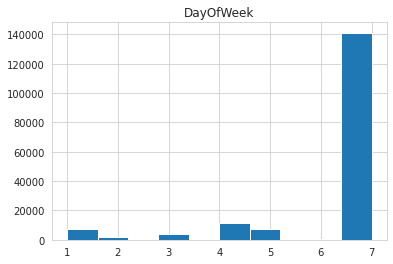

In [64]:
# Check when the store was closed 
train_store_closed.hist('DayOfWeek')

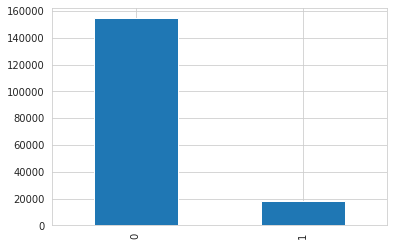

In [65]:
# Check whether there school was closed for holyday 
train_store_closed['SchoolHoliday'].value_counts().plot(kind='bar', stacked=True)

Store                    0
DayOfWeek                0
Sales                    0
Customers                0
Open                     0
Promo                    0
StateHoliday             0
SchoolHoliday            0
Year                     0
Month                    0
Day                      0
WeekofYear               0
SalesPerCustomer    172869
dtype: int64

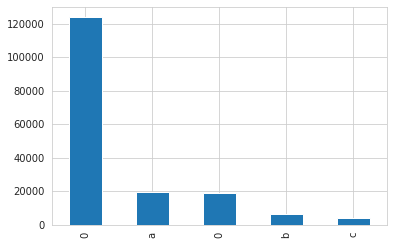

In [66]:
# Check whether there school was closed for holyday 
train_store_closed['StateHoliday'].value_counts().plot(kind='bar')

# Check the null values
# In here there is no null value 
train.isnull().sum()

In [67]:
# Number of days with closed stores
print(train[(train.Open == 0)].shape[0], 'days with closed stores')

# Okay now check No. of dayes store open but sales zero ( It might be caused by external refurbishmnent)
print(train[(train.Open == 1) & (train.Sales == 0)].shape[0], 'days store open but sales zero')

172817 days with closed stores
54 days store open but sales zero


In [68]:
# Replacing missing values for Competiton distance with median
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace=True)

# No info about other columns - so replcae by 0
store.fillna(0, inplace=True)

In [69]:
print(store.isnull().sum(), 'total null in columns')

# Again check it and now its okay 
print(store.isnull().sum().sum(), 'null in columns')

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64 total null in columns
0 null in columns


In [70]:
# Join train and store table 
train_store_joined = pd.merge(train, store, on='Store', how='inner')
train_store_joined.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,SalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,5020,546,1,1,0,1,2015,7,...,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,4782,523,1,1,0,1,2015,7,...,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,5011,560,1,1,0,1,2015,7,...,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,6102,612,1,1,0,1,2015,7,...,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [71]:
train_store_joined.groupby('StoreType')['Customers', 'Sales', 'SalesPerCustomer'].sum().sort_values('Sales', ascending='desc')

,Customers,Sales,SalesPerCustomer
StoreType,,,
b,31465621,159231395,7.987612e+04
c,92129705,783221426,9.744876e+05
d,156904995,1765392943,2.918350e+06
a,363541434,3165334859,4.043129e+06


In [72]:
# Closed and zero-sales observations 
print(train_store_joined[(train_store_joined.Open == 0) | (train_store_joined.Sales==0)].shape, 'total observations')

(172871, 22) total observations


In [73]:
# Open & Sales >0 stores
train_store_joined_open = train_store_joined[~((train_store_joined.Open ==0) | (train_store_joined.Sales==0))]
train_store_joined_open

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,SalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,5020,546,1,1,0,1,2015,7,...,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,4782,523,1,1,0,1,2015,7,...,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,5011,560,1,1,0,1,2015,7,...,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,6102,612,1,1,0,1,2015,7,...,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017202,1115,1,6905,471,1,1,0,1,2013,1,...,14.660297,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017204,1115,6,4771,339,1,0,0,1,2013,1,...,14.073746,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,4540,326,1,0,0,1,2013,1,...,13.926380,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,4297,300,1,0,0,1,2013,1,...,14.323333,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


**Correlation Analysis**

---
The below chart shows a *strong positive correlation* between the number of sales and the number of customers who visit the store. A running promotion **(Promo = 1)** also has a positive correlation with the number of customers.


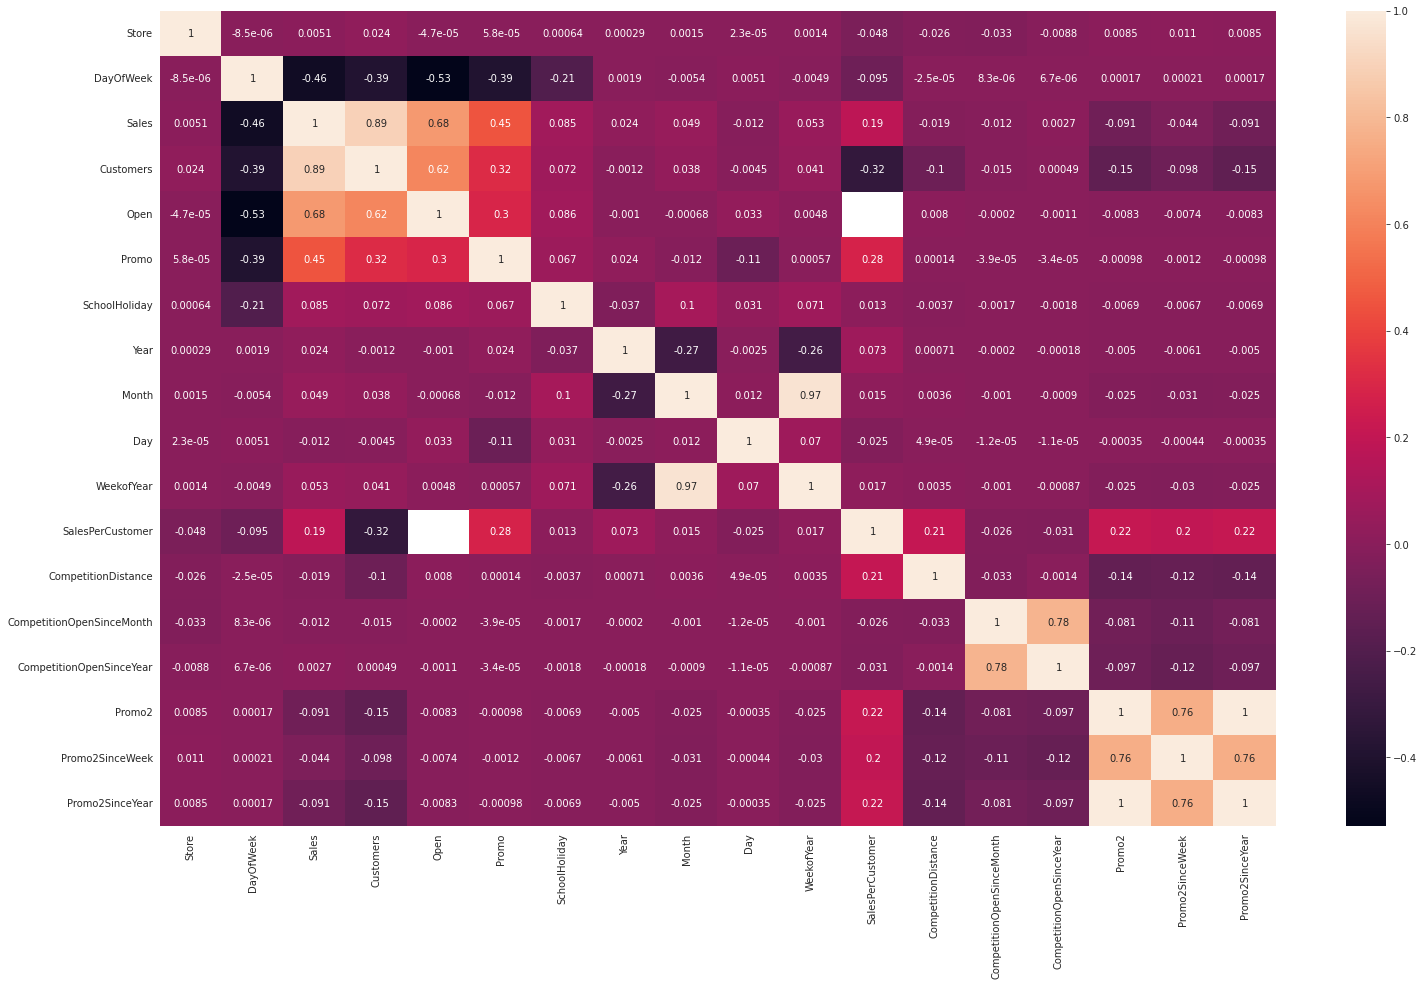

In [74]:
plt.figure(figsize=(25, 15))
sns.heatmap(train_store_joined.corr(), annot=True)

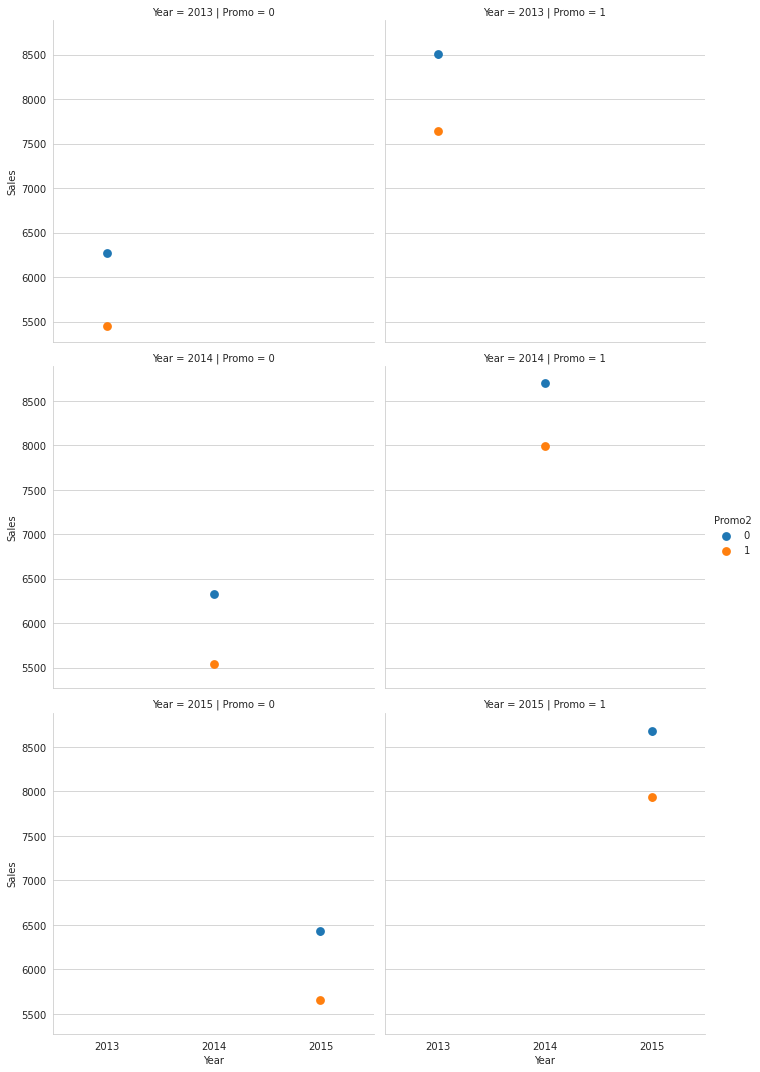

In [75]:
# Now plot the sales trend over the Year 
sns.factorplot(data = train_store_joined_open, x='Year', y='Sales', col ='Promo', hue='Promo2', row='Year')

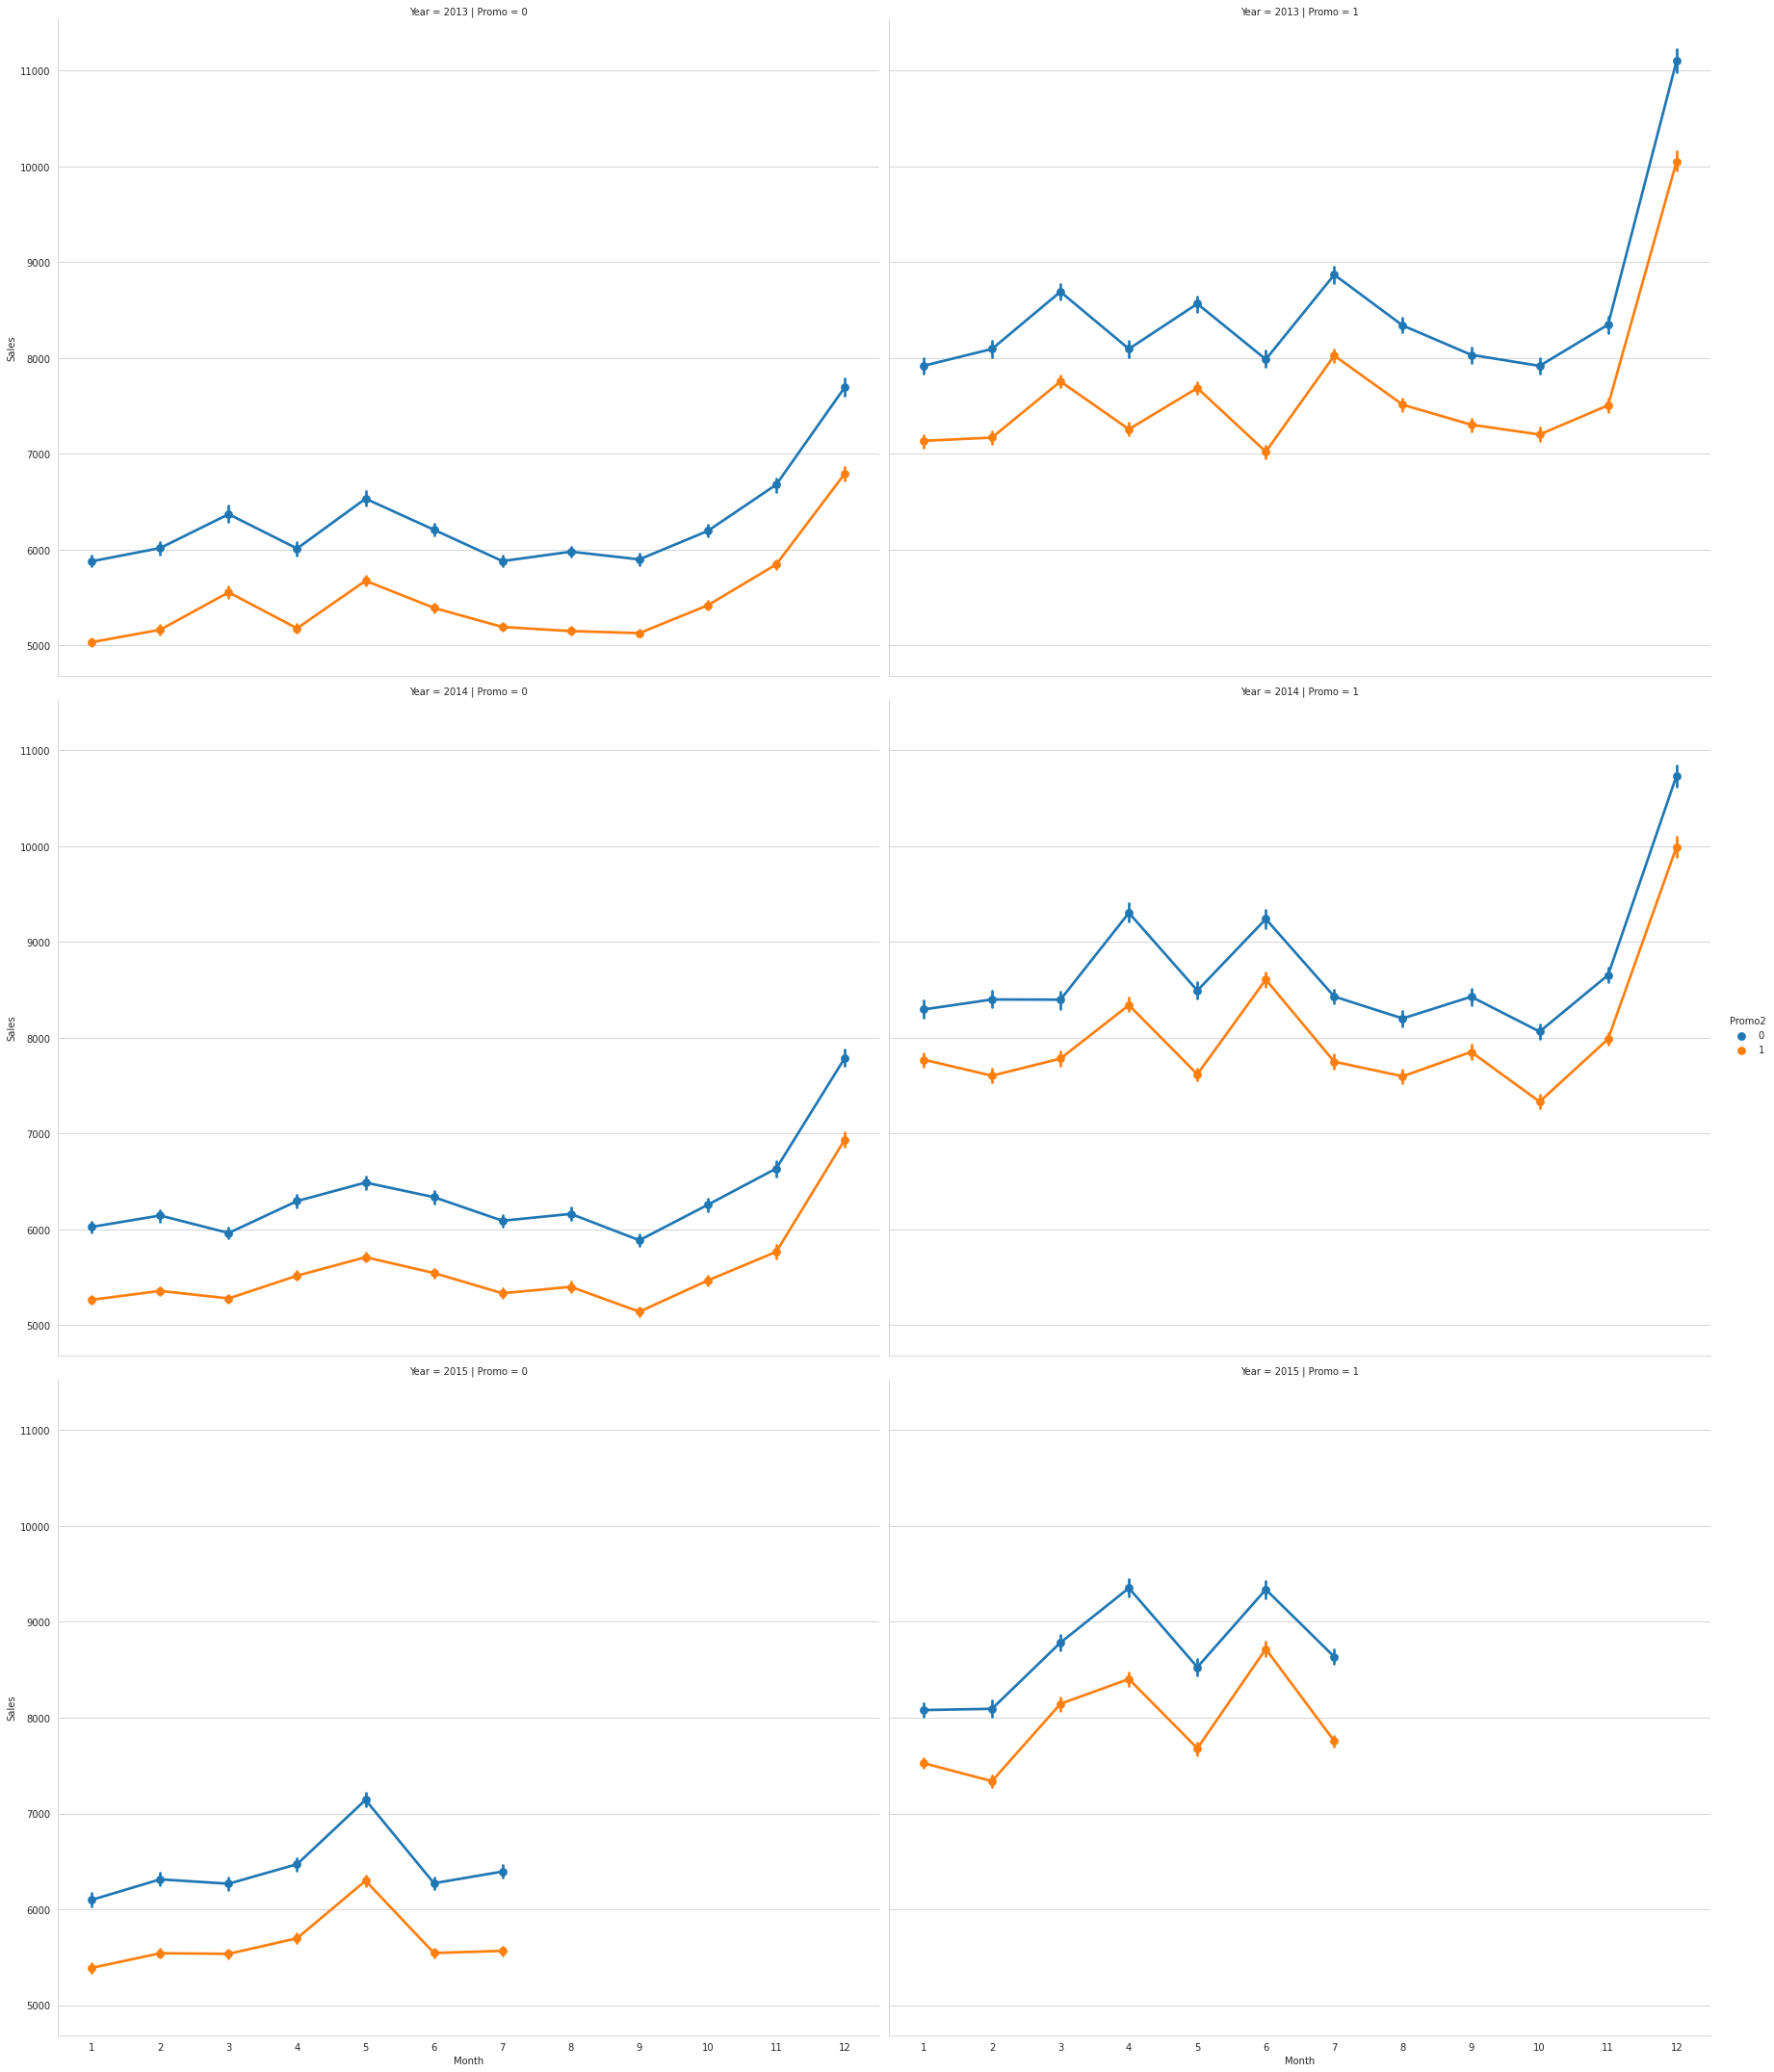

In [76]:
# Now plot the sales trend over the month 
sns.factorplot(data = train_store_joined_open, x='Month', y='Sales', height=10, aspect=10/8, col ='Promo', hue='Promo2', row='Year')


In the graph below, 0 denotes sales and 1 denotes promotions in a week.
 Weekends are not the time for promotions (Saturday and Sunday).
 Sales increased significantly over the weekend due to people purchasing household items without a promotion.
 Mondays are the days when promotions and sales are at their peak.



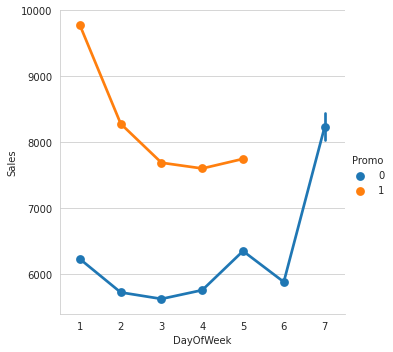

In [77]:
# Sales and trend over days
sns.factorplot(data= train_store_joined_open, x='DayOfWeek', y="Sales", hue='Promo')

print('In the graph below, 0 denotes sales and 1 denotes promotions in a week.\n Weekends are not the time for promotions (Saturday and Sunday).\n Sales increased significantly over the weekend due to people purchasing household items without a promotion.\n Mondays are the days when promotions and sales are at their peak.\n')

**Insights**

---


1. *Storetype A has the most customers and sales.*
2. *Storetype B has the highest SalesPerCustomer.*
3. *There is no promotion offer on Saturday and Sunday.*
4. *Customers plan to purchase goods on Tuesday as part of a promotional offer.*

In [78]:
# Data Preparation: input should be float type 

# our Sales data is int type so lets make it float
train['Sales'] = train['Sales'] * 1.00

train['Sales'].head()

Date
2015-07-31     5263.0
2015-07-31     6064.0
2015-07-31     8314.0
2015-07-31    13995.0
2015-07-31     4822.0
Name: Sales, dtype: float64

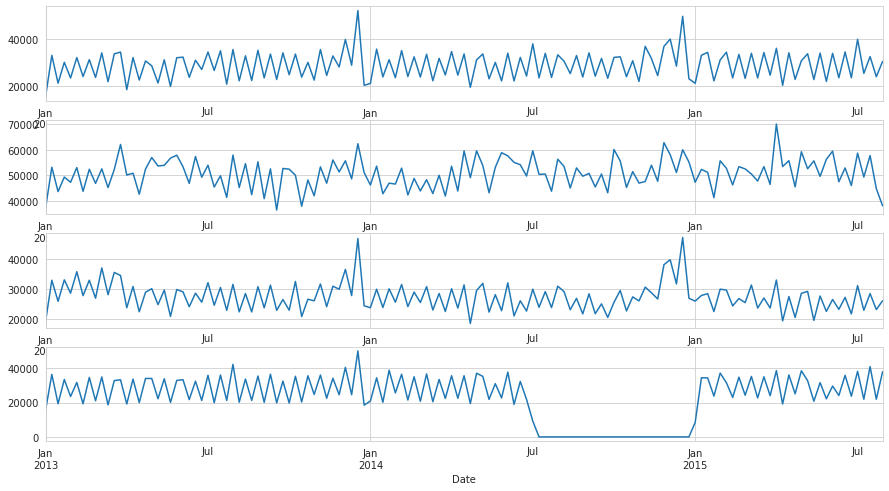

In [79]:
# Assigning one store from each category
sales_a = train[train.Store == 2]['Sales']
sales_b = train[train.Store == 85]['Sales'].sort_index(ascending = True) 
sales_c = train[train.Store == 1]['Sales']
sales_d = train[train.Store == 13]['Sales']

frame, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (15, 8))

# Visualize Trend 
sales_a.resample('w').sum().plot(ax = ax1)
sales_b.resample('w').sum().plot(ax = ax2)
sales_c.resample('w').sum().plot(ax = ax3)
sales_d.resample('w').sum().plot(ax = ax4)


# will be used to resample the speed column of our DataFrame
#The 'W' indicates we want to resample by week. At the bottom of this post is a summary of different time frames.
# You could use for Day = d, MOnth = m, Year = y

There are two methods for determining time series stationarity.

**A)** **Visualization by Rolling Mean:** *To determine a time series model's stability over time, rolling mean analysis is frequently used. On a weekly basis, the window is rolled (slid across the data), and the average is taken. By comparing the original and rolled data, rolling statistics allows us to determine whether or not the data is stationary.*


---


**B)** **The Dicky-Fuller** *test gives us statistical information, such as the p-value, to help us determine whether we can reject the null hypothesis. We will reject the null hypothesis and declare that the data is stationary if the p-value is less than the critical value, which is let's say 0.5.*

In [80]:
# lets create a functions to test the stationarity 
def test_stationarity(timeseries):
    # Determine rolling statestics 
    roll_mean = timeseries.rolling(window=7).mean()
    roll_std = timeseries.rolling(window=7).std()
    
    # plotting rolling statestics 
    plt.subplots(figsize = (10, 5))
    orginal = plt.plot(timeseries.resample('w').mean(), color='blue',linewidth= 3, label='Orginal')
    roll_mean = plt.plot(roll_mean.resample('w').mean(), color='red',linewidth= 3, label='Rolling Mean')
    roll_mean = plt.plot(roll_std.resample('w').mean(), color='green',linewidth= 3, label='Rolling Std')
    
    plt.legend(loc='best')
    plt.show()
    
    # Performing Dickey-Fuller test 
    print('\nResult of Dickey-Fuller test:')
    result= adfuller(timeseries, autolag='AIC')
    
    print('ADF Statestics: %f' %result[0])
    print('P-value: %f' %result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(key, value)


Sales A



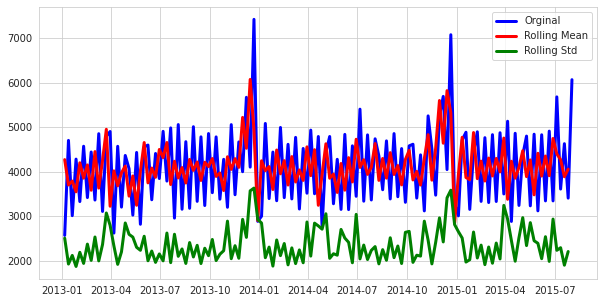


Result of Dickey-Fuller test:
ADF Statestics: -6.218237
P-value: 0.000000
Critical Values:
1% -3.4374778690219956
5% -2.864686684217556
10% -2.5684454926748583

Sales B



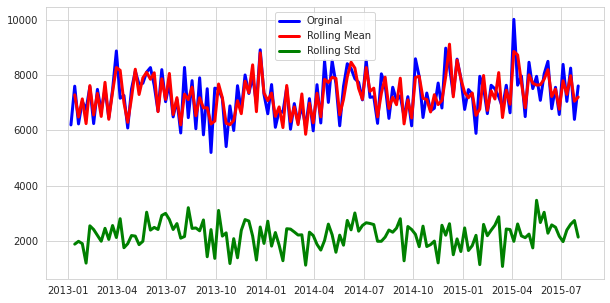


Result of Dickey-Fuller test:
ADF Statestics: -5.660918
P-value: 0.000001
Critical Values:
1% -3.437485646962348
5% -2.8646901138095378
10% -2.568447319459459

Sales C



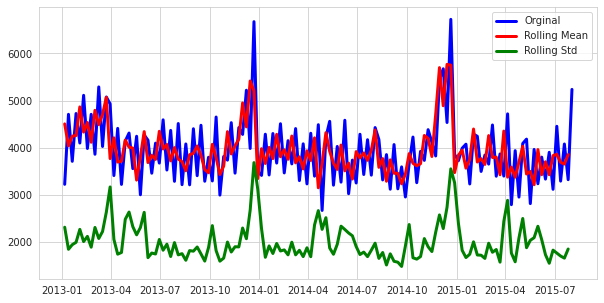


Result of Dickey-Fuller test:
ADF Statestics: -4.374784
P-value: 0.000329
Critical Values:
1% -3.4374778690219956
5% -2.864686684217556
10% -2.5684454926748583

Sales D



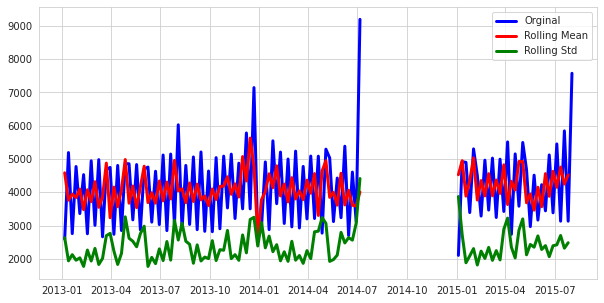


Result of Dickey-Fuller test:
ADF Statestics: -6.237461
P-value: 0.000000
Critical Values:
1% -3.4392539652094154
5% -2.86546960465041
10% -2.5688625527782327


In [81]:
print('\nSales A\n')
test_stationarity(sales_a)

print('\nSales B\n')
test_stationarity(sales_b)

print('\nSales C\n')
test_stationarity(sales_c)

print('\nSales D\n')
test_stationarity(sales_d)

**Lets create trends and seasonality**

---



In [82]:
# plotting trends and seasonality 

def plot_timeseries(sales,StoreType):

    fig, axes = plt.subplots(2, 1, sharex=True, sharey=False)
    fig.set_figheight(6)
    fig.set_figwidth(20)

    decomposition= seasonal_decompose(sales, model = 'additive',freq=365)

    estimated_trend = decomposition.trend
    estimated_seasonal = decomposition.seasonal
    estimated_residual = decomposition.resid
    
    axes[1].plot(estimated_seasonal, 'g', label='Seasonality')
    axes[1].legend(loc='upper left');
    
    axes[0].plot(estimated_trend, label='Trend')
    axes[0].legend(loc='upper left');

    plt.title('Decomposition Plots')

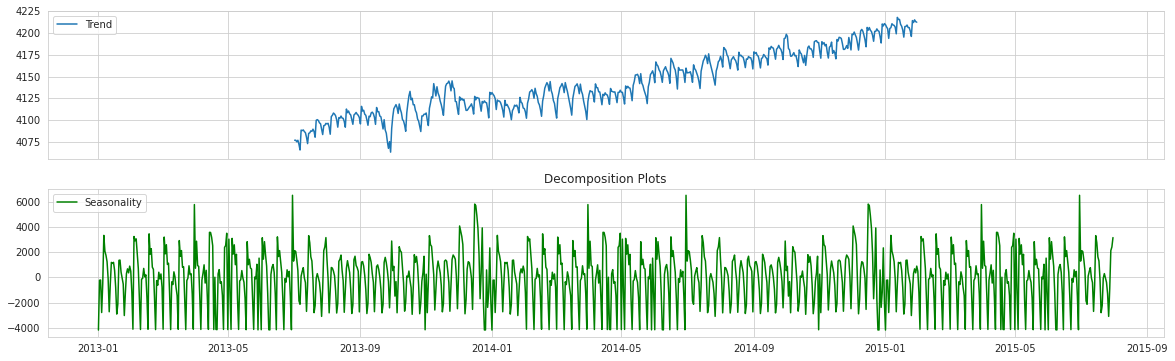

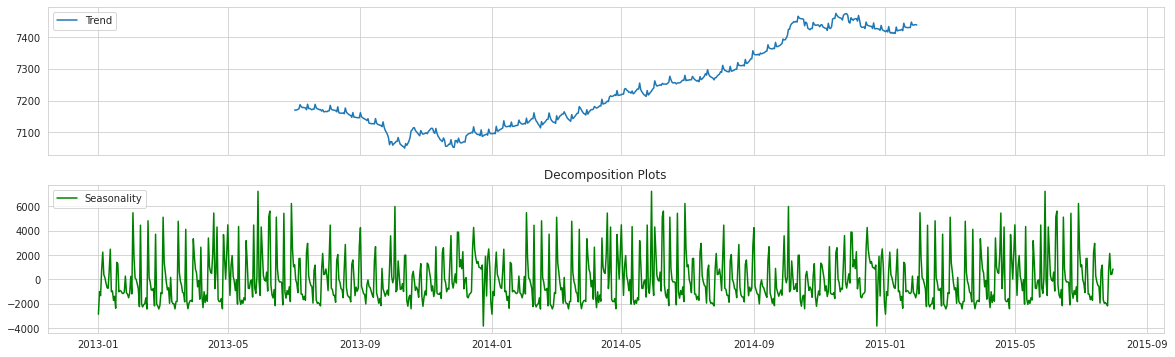

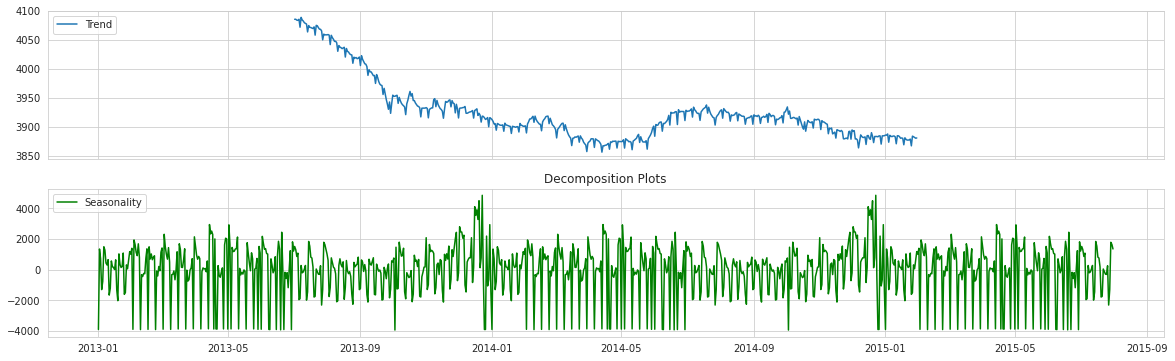

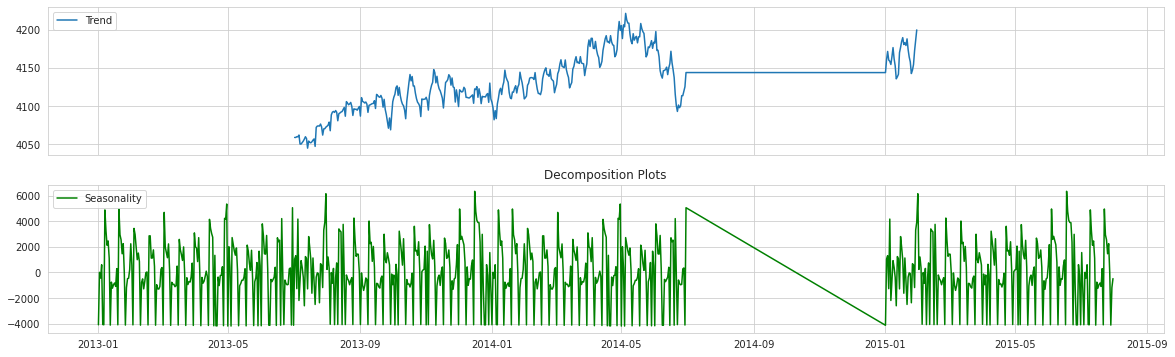

In [83]:
plot_timeseries(sales_a, 'a')
plot_timeseries(sales_b, 'b')
plot_timeseries(sales_c, 'c')
plot_timeseries(sales_d, 'd')

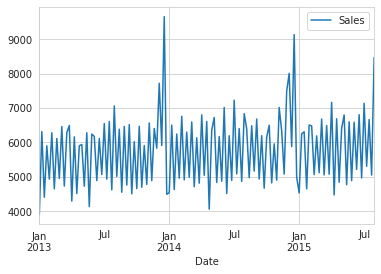

In [84]:
# Summering sales on per week basis 
# ARIMA = Autoregresive Integrated Moving Average 


train_arima = train.resample('w').mean()
train_arima = train_arima[['Sales']]
train_arima.plot()

In [85]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA: ')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA: 
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [86]:
# Determing p,d,q combinations with AIC scores.
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_arima,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2708.8196371542945
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2357.2039807691604
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2142.9121481207667
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1893.8220522798774
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2163.085669279766
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2116.7057912673627
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1919.9439695857754
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1894.9524107319664
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2592.3366943409374
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2305.8868305045544
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2103.017189113569
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1856.635325966139
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2146.042617136125
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2066.9085928056534
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1902.4415089752
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1852.884184252541
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2368.481953362583
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2154.5804531930903
A

In [87]:
# Fitting the data to SARIMA model 
model_sarima = sm.tsa.statespace.SARIMAX(train_arima,
                                        order=(1, 1, 1),
                                        seasonal_order=(1,1,1,12),
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
results_sarima= model_sarima.fit()
print(results_sarima.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5543      0.098     -5.652      0.000      -0.747      -0.362
ma.L1         -1.1418      0.055    -20.766      0.000      -1.250      -1.034
ar.S.L12      -0.1554      0.110     -1.417      0.156      -0.370       0.060
ma.S.L12      -1.0093      0.700     -1.441      0.150      -2.382       0.364
sigma2      6.236e+05   4.65e+05      1.342      0.180   -2.87e+05    1.53e+06


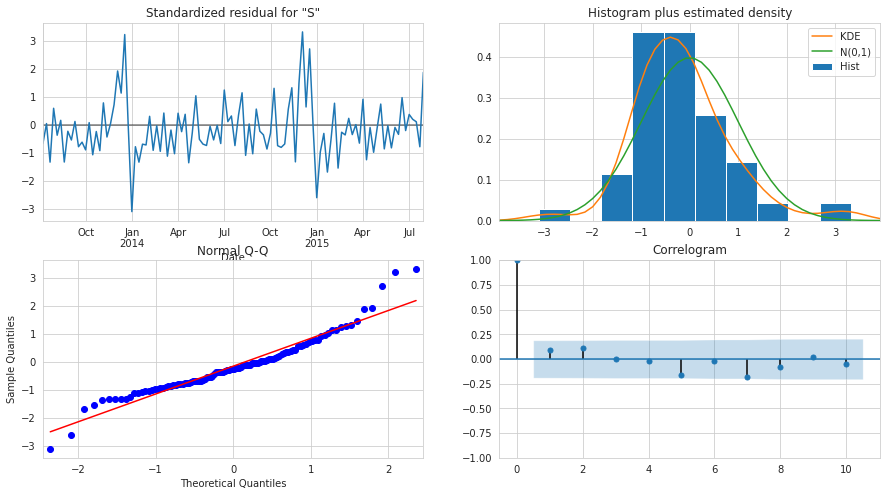

In [88]:
# Checking diagnostic plots
results_sarima.plot_diagnostics(figsize=(15, 8))
plt.show()

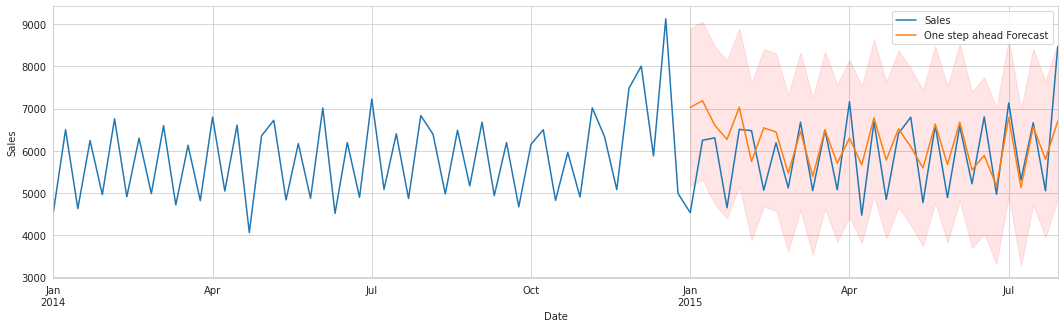


Root Mean Squared Error =  867.9549236713615


In [89]:
# Model prediction 

pred = results_sarima.get_prediction(start=pd.to_datetime('2015-1-4'), dynamic=False)

# Get confidence interval of forecast 
pred_ci = pred.conf_int()

ax = train_arima['2014':].plot(label='Observed', figsize=(18,5))
pred.predicted_mean.plot(ax=ax, label='One step ahead Forecast', alpha=1)

ax.fill_between(pred_ci.index, 
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:,1],
               color='r', alpha=.1)

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

train_arima_forecasted = pred.predicted_mean
train_arima_truth = train_arima['2015-01-04':]

rms_arima= sqrt(mean_squared_error(train_arima_truth,train_arima_forecasted))
print('\nRoot Mean Squared Error = ',rms_arima)

In [90]:
# Save your predicted results for future validation. 
# You could find this results in output sections

train_arima_forecasted.to_csv('/content/drive/MyDrive/Python_Data/predicted_dat.csv')
print('Predicted Data Saved in output')

Predicted Data Saved in output


In [91]:
# Creating a train dataset
train_prophet = train.copy()
train_prophet.reset_index(level=0, inplace=True)

In [92]:
# Converting col names to specific names as required by Prophet library
train_prophet = train_prophet.rename(columns = {'Date': 'ds', 'Sales': 'y'})
train_prophet.head()

,ds,Store,DayOfWeek,y,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekofYear,SalesPerCustomer
0,2015-07-31,1,5,5263.0,555,1,1,0,1,2015,7,31,31,9.482883
1,2015-07-31,2,5,6064.0,625,1,1,0,1,2015,7,31,31,9.702400
2,2015-07-31,3,5,8314.0,821,1,1,0,1,2015,7,31,31,10.126675
3,2015-07-31,4,5,13995.0,1498,1,1,0,1,2015,7,31,31,9.342457
4,2015-07-31,5,5,4822.0,559,1,1,0,1,2015,7,31,31,8.626118


In [93]:
# Downsampling to week because modelling on daily basis takes a lot of time
ts_week_prophet = train_prophet.set_index("ds").resample("W").sum()
ts_week_prophet.head()

,Store,DayOfWeek,y,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekofYear,SalesPerCustomer
ds,,,,,,,,,,,,
2013-01-06,3732032,30103,26129335.0,3110602,4471,0,4533,13464957,6689,23414,6689,39406.143319
2013-01-13,4355190,31220,49275222.0,5226350,6649,5575,560,15711465,7805,78050,15610,65076.326540
2013-01-20,4355190,31220,34377765.0,4205743,6654,0,0,15711465,7805,132685,23415,57208.229656
2013-01-27,4355190,31220,46040169.0,4928833,6665,5575,0,15711465,7805,187320,31220,65073.831993
2013-02-03,4355190,31220,38466029.0,4507650,6667,0,128,15711465,11150,138260,39025,59686.174407


In [94]:
train_store_joined.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekofYear',
       'SalesPerCustomer', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')